In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

In [3]:
folder_path = 'tests_data'
output_folder = 'plots'
os.makedirs(output_folder, exist_ok=True) # create if doesnt exist
excel_files = glob.glob(os.path.join(folder_path, '*.xlsx'))

Different algorithms comparison

In [4]:
for file in excel_files:
    # read and tidy file
    df = pd.read_excel(file, header=None)
    df = df.iloc[:, [0, 3]]
    df.columns = ['benchmark', 'time']
    df[['benchmark', 'size']] = df['benchmark'].str.split('/', n=1, expand=True)
    df['size'] = pd.to_numeric(df['size'], errors='coerce')
    df['time'] = df['time'] * 10e-9 # convert to seconds

    # get plot size name
    filename = os.path.basename(file)
    name_only = os.path.splitext(filename)[0]
    if len(name_only) >= 5:
        plot_label = name_only[4]
        plot_label2 = name_only[6:] if len(name_only) > 6 else '?'
    else:
        plot_label = '?'
        plot_label2 = '?'

    # draw plot - each unique benchmark value as one line
    for bench in df['benchmark'].unique():
        bench_df = df[df['benchmark'] == bench].copy()
        bench_df = bench_df.sort_values('size')
        plt.plot(bench_df['size'], bench_df['time'], marker='o', label=bench)

    # # add log_3(23) plot
    # a = np.log(23) / np.log(3)
    # x_vals = np.linspace(df['size'].min(), df['size'].max(), 200)
    # y_vals = (x_vals ** a) * 10e-7
    # plt.plot(x_vals, y_vals, '--', color='black', label=r'$n^{\log_3 23}$')

    # y2_vals = (x_vals ** 3) * 10e-7
    # plt.plot(x_vals, y2_vals, '--', color='red', label=r'$n^3$')
    
    plt.xlabel('Wymiar macierzy')
    plt.ylabel('Czas (sekundy)')
    plt.yscale('log')
    # plt.xscale('log', base=float(plot_label))
    plt.title(f'Macierze wymiaru kolejnych potęg {plot_label} - granica {plot_label2}')
    plt.legend(title='Benchmark')
    plt.grid(True)
    plt.tight_layout()

    # save plot
    output_path = os.path.join(output_folder, f'plot_{plot_label}_{plot_label2}.png')
    plt.savefig(output_path)
    plt.close()

Strassen3 & naive algorithm complexity

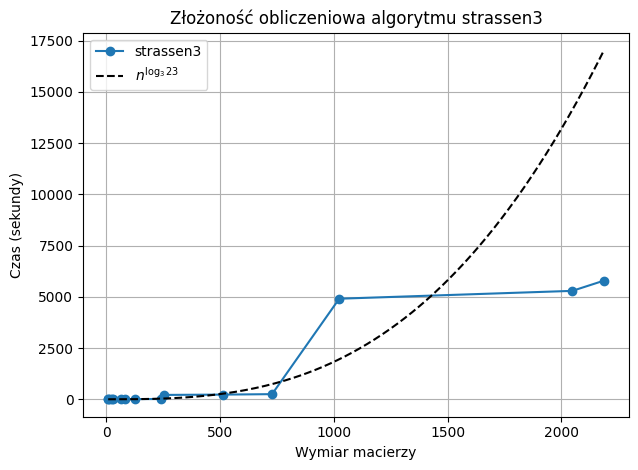

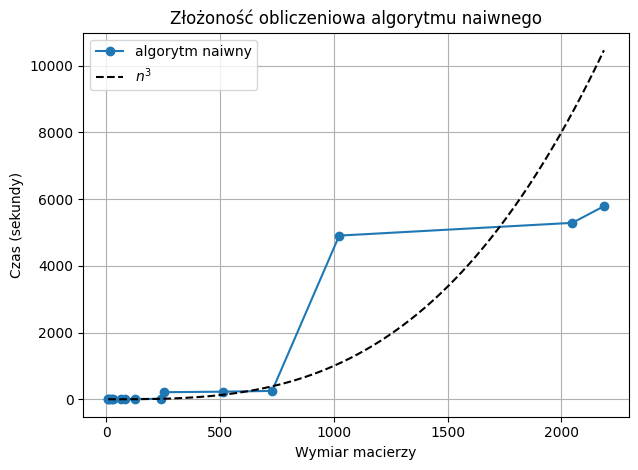

In [22]:
all_data = []
for file in excel_files:
    # read and tidy file
    df = pd.read_excel(file, header=None)
    df = df.iloc[:, [0, 3]]
    df.columns = ['benchmark', 'time']
    df[['benchmark', 'size']] = df['benchmark'].str.split('/', n=1, expand=True)
    df['size'] = pd.to_numeric(df['size'], errors='coerce')
    df['time'] = df['time'] * 10e-9 # convert to seconds

    all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)
strassen_df = combined_df[combined_df['benchmark'] == 'BM_Strassen3']
strassen_df = strassen_df.sort_values('size')

plt.plot(strassen_df['size'], strassen_df['time'], marker='o', label='strassen3')
plt.xlabel('Wymiar macierzy')
plt.ylabel('Czas (sekundy)')
plt.title(f'Złożoność obliczeniowa algorytmu strassen3')
plt.grid(True)
plt.tight_layout()
# plt.yscale('log')
# add log_3(23) plot
a = np.log(23) / np.log(3)
x_vals = np.linspace(df['size'].min(), df['size'].max(), 200)
y_vals = (x_vals ** a) * 5e-6
plt.plot(x_vals, y_vals, '--', color='black', label=r'$n^{\log_3 23}$')
plt.legend()
plt.show()

naive_df = combined_df[combined_df['benchmark'] == 'BM_Strassen3']
naive_df = naive_df.sort_values('size')

plt.plot(naive_df['size'], naive_df['time'], marker='o', label='algorytm naiwny')
plt.xlabel('Wymiar macierzy')
plt.ylabel('Czas (sekundy)')
plt.title(f'Złożoność obliczeniowa algorytmu naiwnego')
plt.grid(True)
plt.tight_layout()
# plt.yscale('log')
# add log_3(23) plot
x_vals = np.linspace(df['size'].min(), df['size'].max(), 200)
y_vals = (x_vals ** 3) * 10e-7
plt.plot(x_vals, y_vals, '--', color='black', label=r'$n^{3}$')
plt.legend()
plt.show()